<a name="top"> <h1>Etapas del proyecto</h1> <a>

<p>Payments Fraud API Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>


<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Docker](#docker) 

   - Creación de ficheros .py
   - Creación de Dockerfile
   - Ejecución del entorno

[2. Flask](#flask) 

   - Creación de la aplicación
   - Creación del HTML

[3. Dashboard de Seguimiento](#dashboard) 


[4. Conclusiones](#conclusiones) 

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 

Esta práctica consiste en simular la puesta en producción del modelo generado en la práctica de fraude mediante una API y generar un dashboard de monitorización. Para ello tendremos tres objetivos:

- **1. Generar un entorno Docker para trabajar y poder ejecutar todo correctamente salvando las dependencias de sistemas operativos, librerías, entornos, etc.**


- **2. Utilizar Flask para poder invocar al modelo generado en la práctica anterior, de forma que se le pasen datos y devuelva la predicción**.


- **3. Se debe almacenar en un fichero del tipo que se desee (csv, json, etc.) todas las llamadas que se han hecho a la API y la predicción que se ha devuelto, para generar un dashboard de seguimiento**.

# <a name="docker"> 1. Docker <a> 

Para la creación del entorno Docker, hemos realizado 2 etapas: Creación de ficheros .py y creacion del Dockerfile. 

## 1.1. Creación de ficheros .py

En esta etapa, la tarea a realizar fué trasladar las funciones y transformaciones realizadas durante el análisis exploratorio (`0_EDA`), el preprocesamiento (`01_Preprocessing`) y selección del modelo (`3_ModelSelection`) del [Payments Fraud Project](https://github.com/ComputingVictor/Payments_Fraud_Practice/tree/main/notebooks), con el objetivo de entrenar el modelo y que cree el pickle, para utilizarlo posteriormente. Todos estos procesos sn introducidos en `train.py`.


Posteriormente, debemos crear el archivo `prediction.py`, donde introduciremos las operaciones de predicción, importando el pickle y los documentos de test `x_test`, `y_test`. Con el objetivo de que una vez ejecutado el script, nos exporte un documento llamado `output` de tipo excel que incluya las predicciones.

Cabe destacar la importancia de importar todas las librerias utilizadas para evitar errores, además de agregar al directorio el file original `data`, de donde se crearan tanto los archivos de train como de test.

## 1.2. Creación de Dockerfile

El Dockerfile es el archivo que permitirá a Docker seguir las instrucciones para componer el entorno que deseamos. Para ello es importante saber que pasos realizar. 

En nuestro caso importamos la imagen jupyter/scipy-notebook, debido a que instala directamente gran parte de las librerias necesarias para el uso de ciencia de datos, ahorrando el proceso de instalarlas individualmente. 

Hay que crear un directorio de trabajo para ello mediante  WORKDIR creamos el directorio data.

En siguiente lugar, dado que para nuestro proyecto necesitamos algunas librerias especificas (xgboost, category encoders, plotly) las instalamos mediante el comando RUN.

Después copiamos dentro del entorno tanto los datos originales `data.csv`, las funciones de transforamción usadas en el EDA `aux_functions.py`, y los scripts de train y predicción `train.py`, `prediction.py`.

Finalmente, una vez realizadas las tareas anteriores, agregamos el comando RUN, para que comience a entrenar el modelo, mediante `train.py`



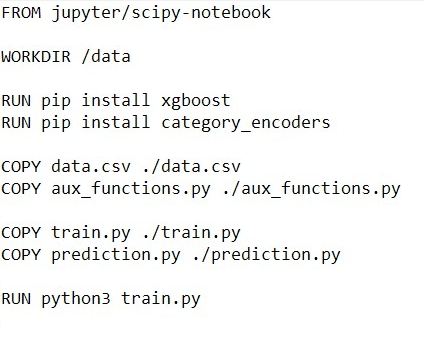

## 1.3. Ejecución del entorno

Para poner en funcionamiento el entorno, es hora de ejecutar los scripts. En primer lugar crearemos el entorno mediante Docker, para ello deberemos fiajrnos que la aplicación Docker esta ejecutada. Posteriormente introducimos mediante Git, en el directorio donde se encuentra el archivo `Dockerfile`, el siguiente comando, que realizará los pasos detallados en el punto anterior:

`docker build -t docker-api -f Dockerfile .`




Una vez ejecutado, observaremos que ya tenemos una imagen creada con el entorno llamada `docker-api`. Por lo que procedemos a realizar la predicción:

`docker run docker-api python3 prediction.py`

Al ejecutarse observaremos que también se ha creado un contenedeor con un nombre aleatorio. Por lo que en el caso de querer obtener las predicciones y traerlo a tu dispositivo, será necesario utilizar este comando, sustituyendo 'youthful_hermann' por tu contenedor:

`docker cp youthful_hermann:/data/output.xlsx .`

Para el paso siguiente nos hará falta el modelo entrenado, por lo que lo extraeremos mediante :

`docker cp youthful_hermann:/data/xgb_model_test.pickle .`


Finalmente habremos obtenido las predicciones deseadas en un entorno ajeno y el modelo entrenado.

# <a name="flask"> 2. Flask <a> 

En este apartado, cabe destacar diferentes procedimientos realizados para crear una web local que realice predicciones según las variables introducidas.

## 2.1. Creación de la aplicación

Para la creación de la aplicación será necesario trasladar el archivo `xgb_model_test.pickle` al directorio `Flask/` obtenido mediante el entorno Docker.

Para la creación de la aplicación en primer luagar importaremos las librerias necesarias y definiremos el directorio a trabajar.

Posteriormente creamos la aplicación Flask y cargamos el modelo pickle. Para la aplicación utilziaremos una web HTML para poder utilizarla por el navegador, por lo que redirigimos la ruta de la aplicación al html que crearemos posteriormente.

Para la predicción, creamos la clase /predict, donde introduciremos las variables, ajustadas al formato, realizaremos la predicción y la devolveremos dentro de las clases creadas en el html que haremos a continuación.

Finalmente introducimos una función que cree un archivo `log.csv` en el directorio, con las variables introducidas y su  predicción, la cual se vaya actualizando en función de las consultas realizadas, por si se quisiera crear un dashboard de seguimiento.

## 2.2. Creación del HTML

Para la creación del fichero HTML, crearemos una carpeta `templates` dentro de `Flask/`, donde lo crearemos, dado que la aplicación tiene predeterminado bsucar este directorio.

Para la creación del archivo me he ayudado de una herramienta para visualizar en directo, los cambios realizados en directo. EL objetivo ha sido poner un titulo en grande del proyecto, una pequeña introducción destacando la importancia de leerse el diccionario de datos para poder introducir en las diferentes filas de variables los datos correctamente.

Finalmente por debajo aparece el boton de predict y el resultado en %, una vez introducido los valores.

Para el diseño de la web, em he ayudado de una plantilla básica CSS, que esta introducido dentro del fichero HTML.

Para ejecutar la aplicación se debe introducir el siguiente prompt en python:

`python app.py`


Finalmente la web en local quedaría de esta manera:

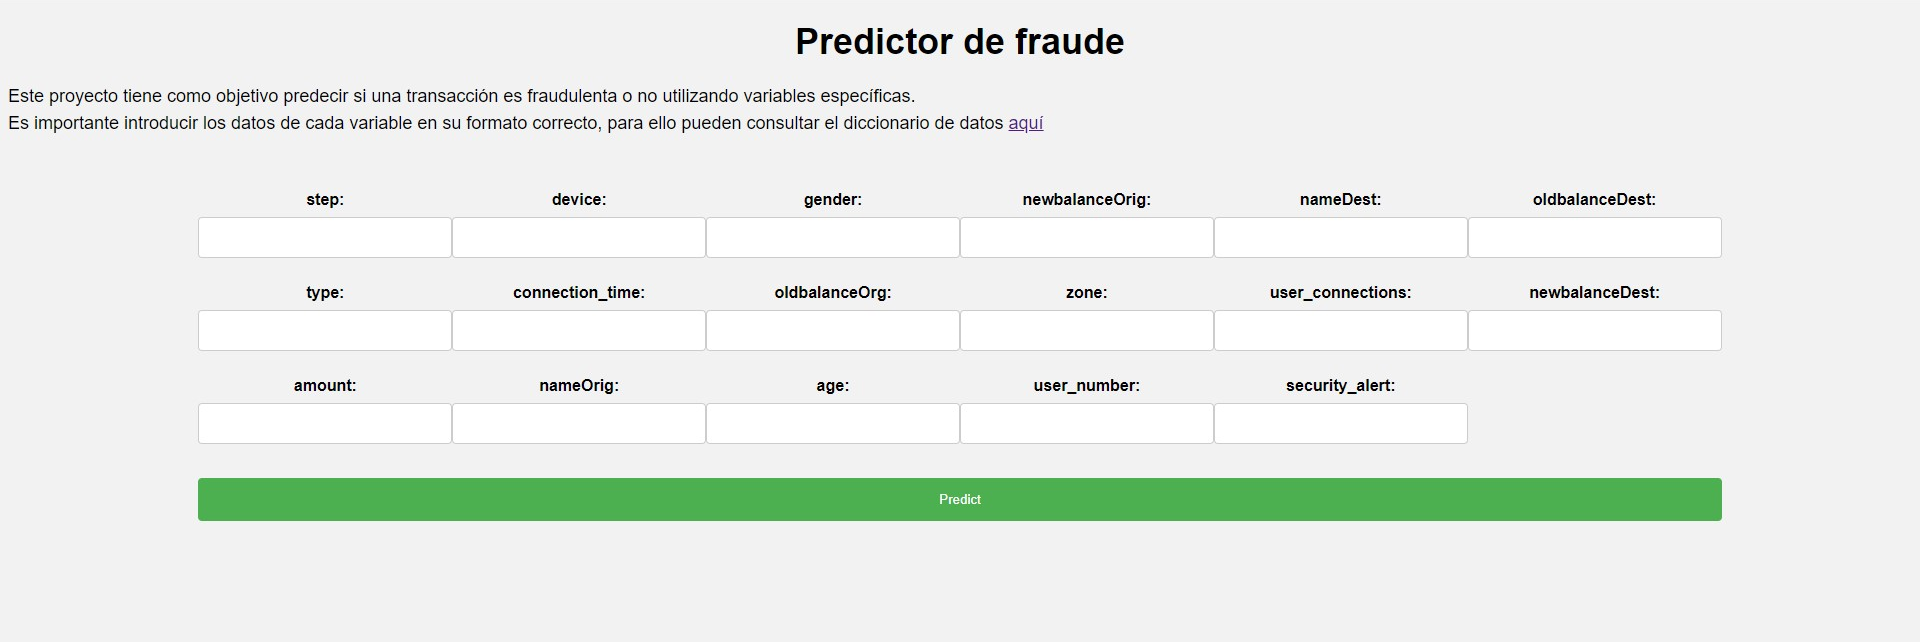

# <a name="dashboard"> 3. Dashboard de seguimiento <a> 

Finalmente, una vez puesto en funcionamiento el modelo, creado un archivo log ocn las diferentes consultas realizadas en la API, he considerado a crear un dashboard simple, con bastante margen de mejora. Sin embargo, permite hacerse una idea de utilidades que puede tener para representar gráficamente los datos. 

La herramienta utilizada para realizarlo ha sido Power BI, puede encontrarse en el directorio `Flask/` y así luciría tras unas transformaciones programadas automaticamente cada vez que se actualice el archivo `log.csv`: 

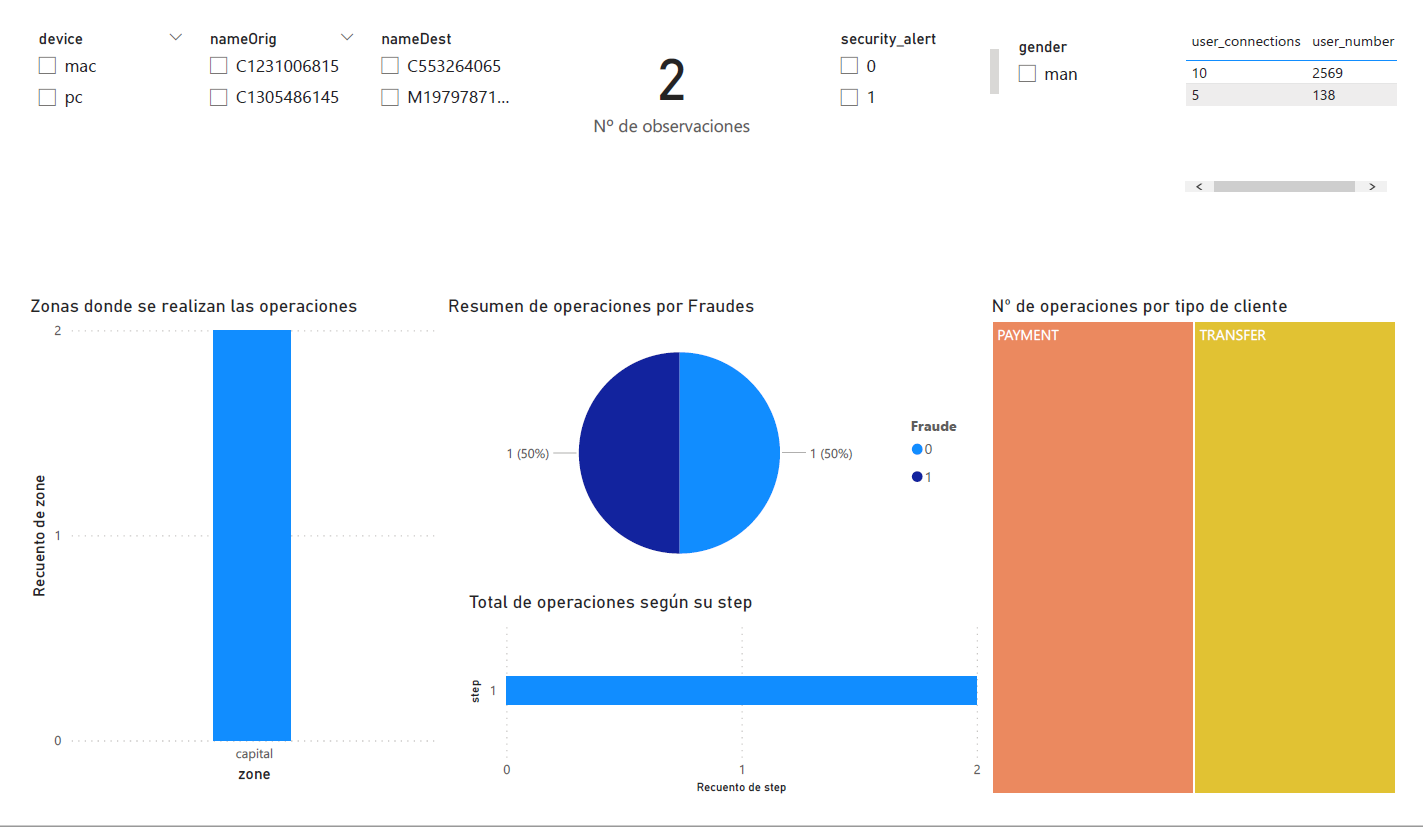

# <a name="conclusiones"> 4. Conclusiones Generales <a> 

**Mediante esta práctica he podido llevar a cabo la puesta en producción de un modelo predictorio de fraude. Para ello he aprendido a componer un entorno Docker donde realizar las predicciones y obtener el modelo directamente sin necesidad de instalar nada en local ni procesos engorrosos.**

**Más adelante, hem aprendido a crear una aplicación que introduciendo las variables puedas obtener la predicción y en caso de desearlo asignarlo a un dominio de acceso público.**

**Finalmente, mediante la creación de logs, podemos llevar a cabo un seguimiento de los resultados mediante un informe gráfico que nos ayude a estudiar los datos**

[Ir arriba del documento](#top)